In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [34]:
train = pd.read_csv('Train.csv')
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [3]:
print("The dataset has {} rows and {} columns.".format(train.shape[0], train.shape[1]), '\n')
print("The dataset has {} duplicate rows.".format(train.duplicated().sum()), '\n')
print("The dataset has {} missing values.".format(train.isnull().sum().sum()))

The dataset has 3870 rows and 44 columns. 

The dataset has 0 duplicate rows. 

The dataset has 20803 missing values.


In [35]:
test = pd.read_csv('Test.csv')
test.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,2022-07-29,1.0,LabourAvailability IrrigWaterAvailability PreM...,IrrigWaterAvailability LaborAvailability RainA...,2.0,Boring,Diesel,200.0,2.0,FYM,NaN,2.0,SoilApplied,3,DAP,6.0,NaN,Broadcasting,Urea,8.0,23.0,6.0,63.0,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,2022-08-02,4.0,CalendarDate SeedAvailability IrrigWaterAvaila...,CalendarDate SeedlingAge IrrigWaterAvailabilit...,2.0,Canal,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3,DAP,5.0,NaN,Broadcasting,Urea,7.0,23.0,8.0,65.0,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-07,5,Manual_PuddledRandom,2022-06-24,2022-07-08,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge RainArrival IrrigWaterAvailability...,4.0,Canal,NaN,NaN,10.0,Ganaura,2.0,NaN,Broadcasting,2,DAP Urea,9.0,18.0,Broadcasting,Urea,9.0,38.0,NaN,NaN,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough...,2022-07-04,5,Manual_PuddledRandom,2022-06-20,2022-07-10,2.0,CalendarDate IrrigWaterAvailability LabourAvai...,CalendarDate SeedlingAge RainArrival IrrigWate...,2.0,Boring,Diesel,NaN,NaN,FYM,NaN,5.0,SoilApplied,2,DAP,15.0,NaN,SoilApplied,Urea,9.0,30.0,NaN,NaN,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-21,3,Manual_PuddledRandom,2022-06-24,2022-07-22,1.0,SeedAvailability IrrigWaterAvailability,SeedlingAge IrrigWaterAvailability LaborAvaila...,6.0,Boring,Electric,400.0,NaN,NaN,NaN,NaN,NaN,2,DAP Urea,20.0,15.0,Broadcasting,Urea,15.0,40.0,NaN,NaN,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500


In [5]:
print("The dataset has {} rows and {} columns.".format(test.shape[0], test.shape[1]), '\n')
print("The dataset has {} duplicate rows.".format(test.duplicated().sum()), '\n')
print("The dataset has {} missing values.".format(test.isnull().sum().sum()))

The dataset has 1290 rows and 43 columns. 

The dataset has 0 duplicate rows. 

The dataset has 6854 missing values.


# EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [36]:
# Deal with missing values
# Drop columns with more than 50% missing values
for col in train.columns:
    if train[col].isnull().sum() / train.shape[0] > 0.5:
        train.drop(col, axis=1, inplace=True)
        test.drop(col, axis=1, inplace=True)

In [37]:
train.shape, test.shape

((3870, 40), (1290, 39))

In [38]:
# Impute missing values
# Impute missing values with mean for numerical columns
for col in train.columns:
    if train[col].isnull().sum() > 0 and train[col].dtype != 'object':
        train[col].fillna(train[col].mean(), inplace=True)
        test[col].fillna(test[col].mean(), inplace=True)

# Impute missing values with mode for categorical columns
for col in train.columns:
    if train[col].isnull().sum() > 0 and train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)

In [39]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [12]:
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,536.622443,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.000000,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.000000,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.000000,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,536.622443,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


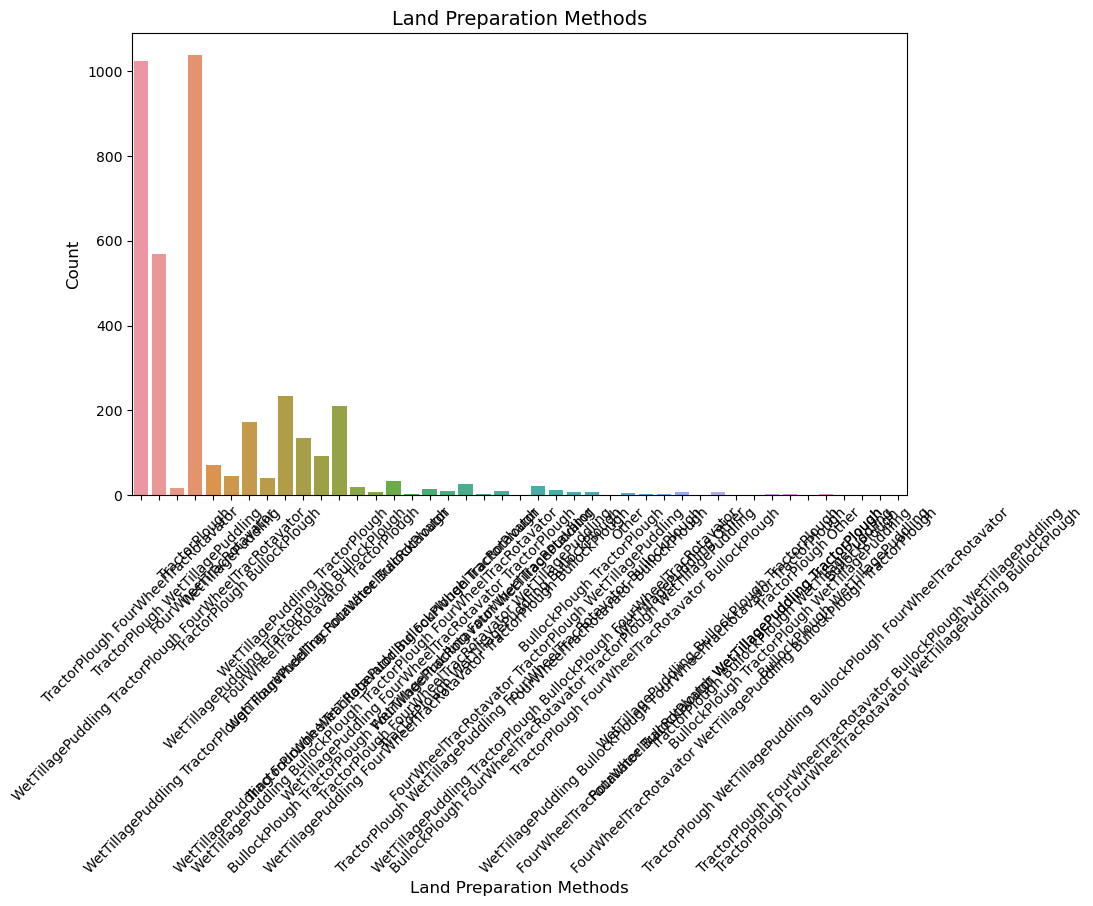

In [14]:
# Land Prep Methods
plt.figure(figsize=(10, 6))
sns.countplot(x='LandPreparationMethod', data=train)
plt.title('Land Preparation Methods', fontsize=14)
plt.xlabel('Land Preparation Methods', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show();

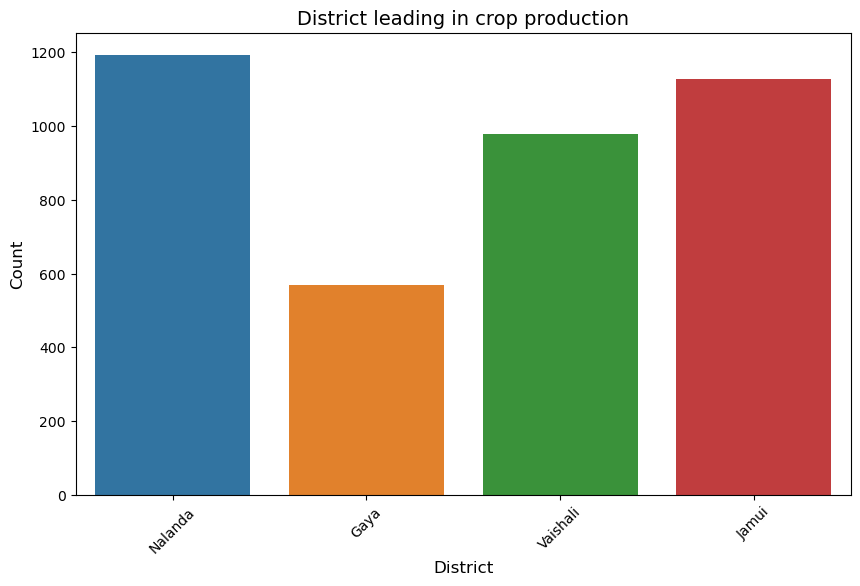

In [15]:
# District leading in crop production
plt.figure(figsize=(10, 6))
sns.countplot(x='District', data=train)
plt.title('District leading in crop production', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show();

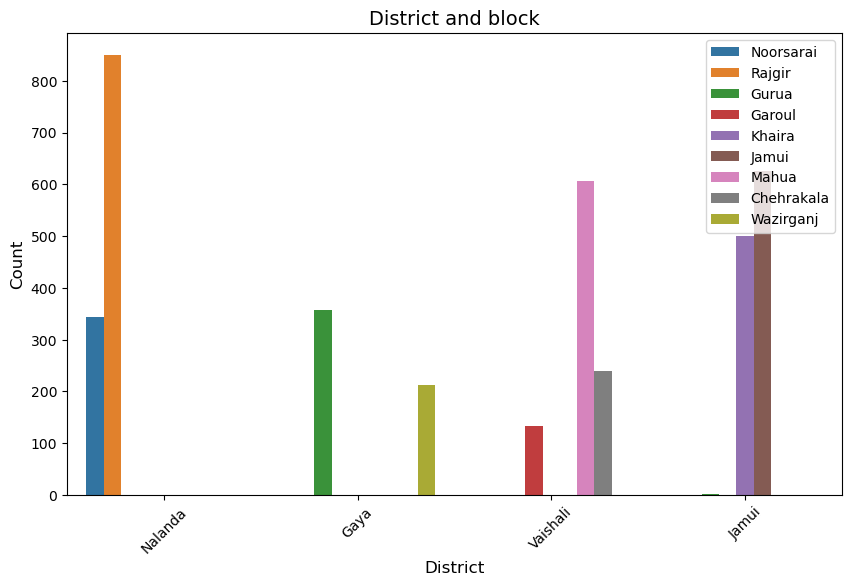

In [16]:
# District and block
plt.figure(figsize=(10, 6))
sns.countplot(x='District', hue='Block', data=train)
plt.title('District and block', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show();

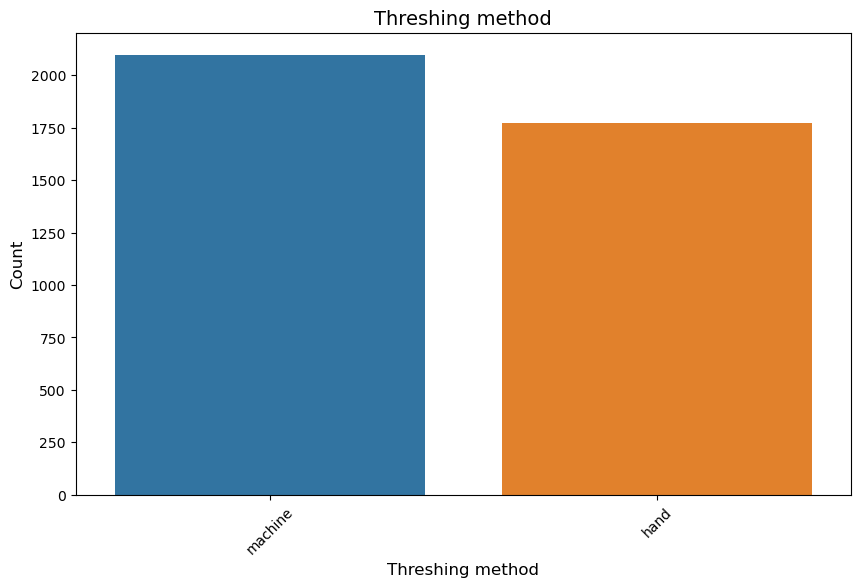

In [18]:
# Threshing method
plt.figure(figsize=(10, 6))
sns.countplot(x='Threshing_method', data=train)
plt.title('Threshing method', fontsize=14)
plt.xlabel('Threshing method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show();

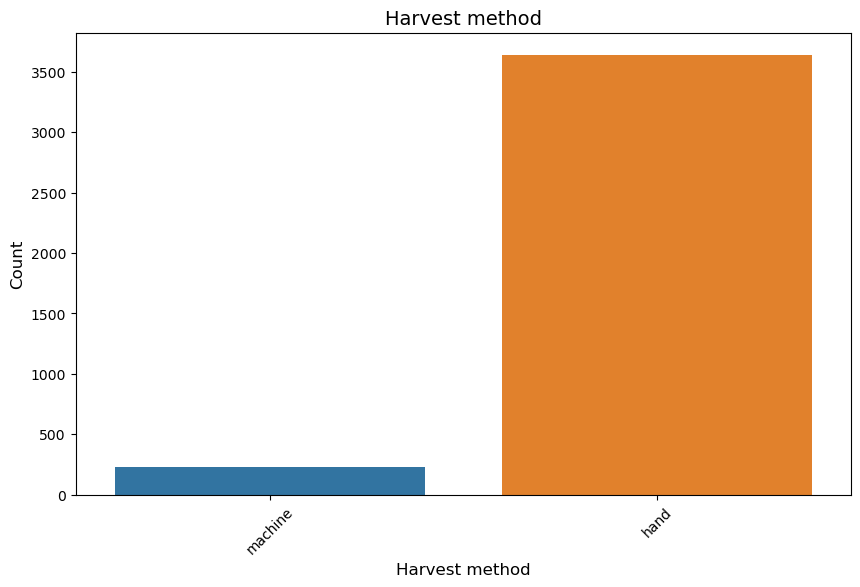

In [20]:
# Harvest method
plt.figure(figsize=(10, 6))
sns.countplot(x='Harv_method', data=train)
plt.title('Harvest method', fontsize=14)
plt.xlabel('Harvest method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [10]:
pd.set_option('display.max_columns', None)
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,200.000000,2.000000,Ganaura,SoilApplied,2,Urea,11.452359,20.000000,Broadcasting,Urea,15.0,18.0,Broadcasting,machine,2022-11-16,536.622443,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,125.000000,3.000000,Ganaura,SoilApplied,2,DAP Urea,15.000000,10.000000,Broadcasting,Urea,20.0,39.0,Broadcasting,hand,2022-11-25,3.000000,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.000000,Boring,Electric,80.000000,2.000000,Ganaura FYM,SoilApplied,2,DAP,4.000000,13.351801,SoilApplied,Urea,5.0,65.0,RootApplication,hand,2022-12-12,480.000000,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,8.017677,Boring,Electric,379.726908,3.247522,Ganaura,SoilApplied,2,DAP Urea,6.000000,3.000000,Broadcasting,Urea,5.0,5.0,Broadcasting,hand,2022-12-02,240.000000,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.000000,Boring,Electric,300.000000,2.000000,Ganaura,SoilApplied,2,Urea DAP,15.000000,30.000000,Broadcasting,Urea,30.0,26.0,Broadcasting,machine,2022-11-30,536.622443,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


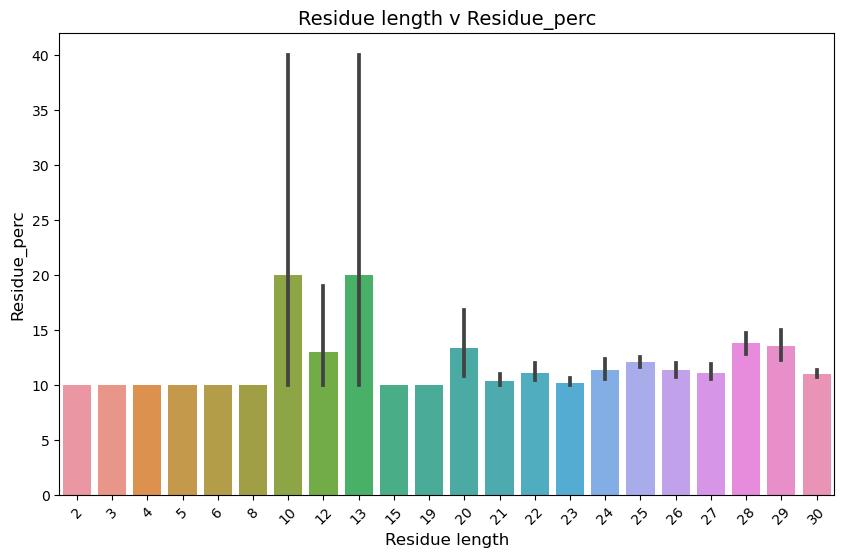

In [23]:
# Residue length v Residue_perc
plt.figure(figsize=(10, 6))
sns.barplot(x='Residue_length', y='Residue_perc', data=train)
plt.title('Residue length v Residue_perc', fontsize=14)
plt.xlabel('Residue length', fontsize=12)
plt.ylabel('Residue_perc', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [40]:
# Correlation for numerical columns
corr = train.corr()
corr

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield
CultLand,1.000000,0.969350,0.024248,-0.041040,0.017038,-0.016854,0.139621,-0.042980,0.443587,0.347312,0.440327,0.165884,6.209914e-02,-0.117823,3.816386e-01,0.409604,0.254201
CropCultLand,0.969350,1.000000,0.035786,-0.035431,0.008512,-0.005998,0.174032,-0.066414,0.414499,0.326448,0.427635,0.178524,4.633984e-02,-0.119789,3.704563e-01,0.394070,0.246221
CropTillageDepth,0.024248,0.035786,1.000000,-0.044740,0.013024,-0.133897,-0.126158,-0.121384,-0.014883,0.024762,0.011899,0.196616,3.828399e-02,-0.027913,-1.679163e-01,-0.001449,-0.002953
SeedlingsPerPit,-0.041040,-0.035431,-0.044740,1.000000,-0.004236,0.036239,-0.013095,-0.032590,-0.006154,-0.016314,-0.029811,-0.023383,-2.371386e-02,0.032597,-1.482786e-02,-0.032880,-0.023307
TransplantingIrrigationHours,0.017038,0.008512,0.013024,-0.004236,1.000000,0.124523,-0.067362,0.035053,0.007107,0.028908,0.013615,0.001981,1.569956e-02,0.040401,6.738173e-03,0.017353,-0.007706
TransIrriCost,-0.016854,-0.005998,-0.133897,0.036239,0.124523,1.000000,-0.119306,0.037947,0.274394,0.194576,0.078211,-0.104369,9.661463e-02,0.054365,-1.254681e-02,0.344167,0.264303
StandingWater,0.139621,0.174032,-0.126158,-0.013095,-0.067362,-0.119306,1.000000,-0.261204,-0.005719,0.035147,0.114101,0.209803,-3.451936e-03,-0.162629,1.844249e-02,0.030222,0.000100
NoFertilizerAppln,-0.042980,-0.066414,-0.121384,-0.032590,0.035053,0.037947,-0.261204,1.000000,-0.138287,-0.061000,-0.216478,-0.088887,-5.860075e-03,0.195066,-2.951250e-02,-0.011640,-0.020704
BasalDAP,0.443587,0.414499,-0.014883,-0.006154,0.007107,0.274394,-0.005719,-0.138287,1.000000,0.549695,0.598574,0.067017,1.577992e-01,-0.128331,2.795800e-01,0.646200,0.409907
BasalUrea,0.347312,0.326448,0.024762,-0.016314,0.028908,0.194576,0.035147,-0.061000,0.549695,1.000000,0.473565,0.025572,1.003100e-01,-0.060491,2.599541e-01,0.502720,0.277017


<Axes: >

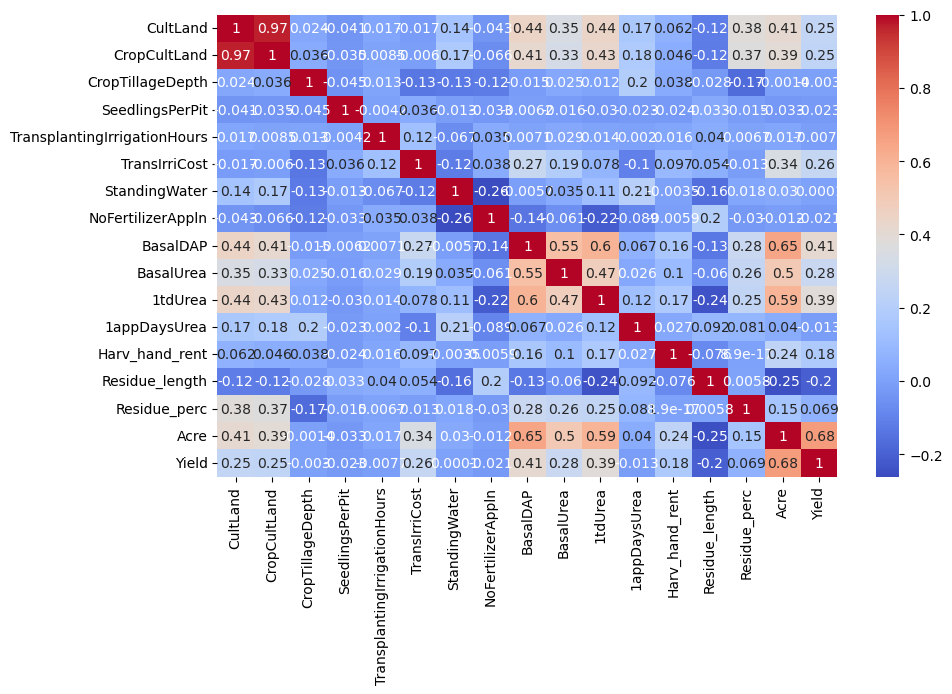

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [42]:
# Pick columns with correlation greater than 0.5
corr_cols = corr[corr['Yield'] > 0.2].index.tolist()
corr_cols.remove('Yield')
corr_cols

['CultLand',
 'CropCultLand',
 'TransIrriCost',
 'BasalDAP',
 'BasalUrea',
 '1tdUrea',
 'Acre']

# Modelling

In [47]:
# Categorical columns 
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['ID', 'Yield']]
cat_cols

['District',
 'Block',
 'LandPreparationMethod',
 'CropTillageDate',
 'CropEstMethod',
 'RcNursEstDate',
 'SeedingSowingTransplanting',
 'NursDetFactor',
 'TransDetFactor',
 'TransplantingIrrigationSource',
 'TransplantingIrrigationPowerSource',
 'OrgFertilizers',
 'PCropSolidOrgFertAppMethod',
 'CropbasalFerts',
 'MineralFertAppMethod',
 'FirstTopDressFert',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Harv_date',
 'Threshing_date',
 'Threshing_method',
 'Stubble_use']

In [48]:
# One hot encoding
train = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test = pd.get_dummies(test, columns=cat_cols, drop_first=True) # drop_first=True to avoid dummy variable trap

In [49]:
# Split into features and target
X = train.drop('Yield', axis=1)
y = train['Yield']

X.shape, y.shape

((3870, 909), (3870,))

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, lr_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_pred))
print('R2 Score: ', r2_score(y_test, lr_pred))

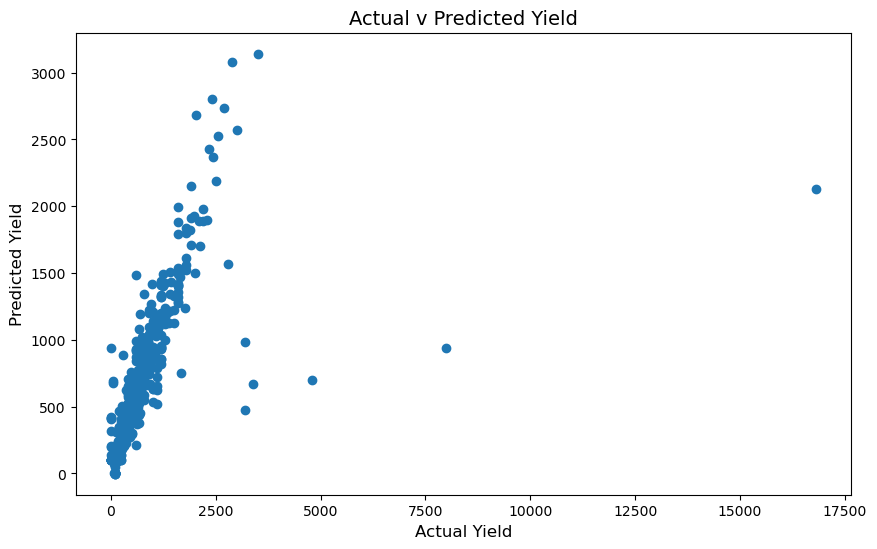

In [75]:
# Visualize the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Yield', fontsize=12)
plt.ylabel('Predicted Yield', fontsize=12)
plt.title('Actual v Predicted Yield', fontsize=14)
plt.show();

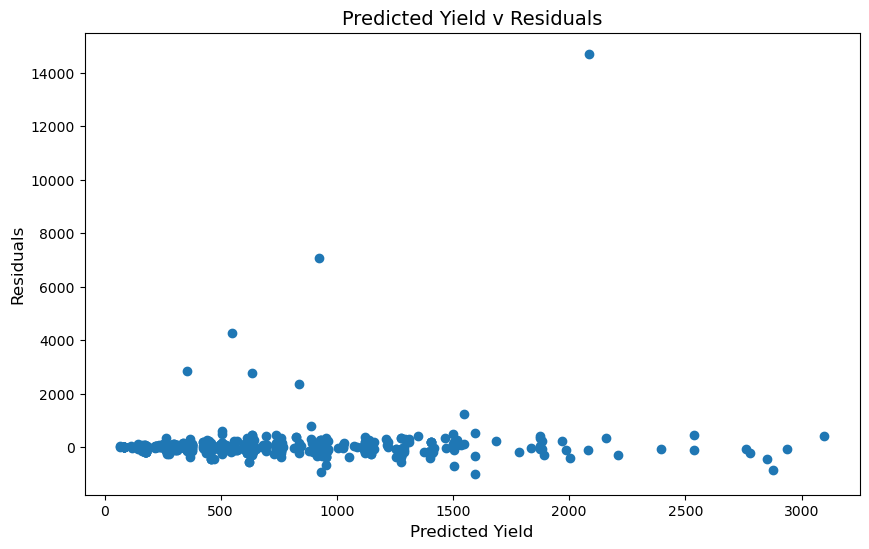

In [48]:
# Visualize residuals
plt.figure(figsize=(10, 6))
plt.scatter(lr_pred, y_test - lr_pred)
plt.xlabel('Predicted Yield', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Predicted Yield v Residuals', fontsize=14)
plt.show();

Mean Squared Error:  426988.343611111
rmse:  653.4434509665783
Mean Absolute Error:  111.78850129198966
R2 Score:  0.3762987787664568


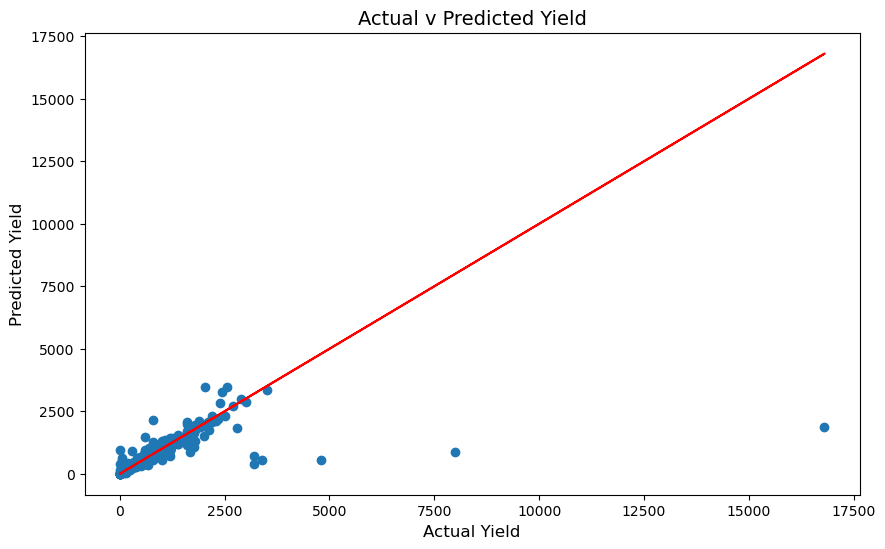

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, rf_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rf_pred))
print('R2 Score: ', r2_score(y_test, rf_pred))

# Visualize the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Yield', fontsize=12)
plt.ylabel('Predicted Yield', fontsize=12)
plt.title('Actual v Predicted Yield', fontsize=14)
plt.show();

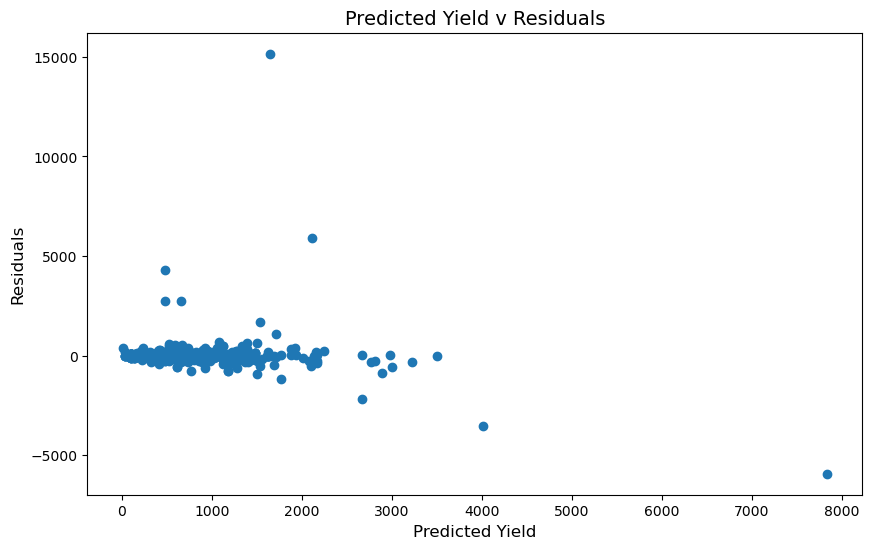

In [50]:
# Visualize residuals
plt.figure(figsize=(10, 6))
plt.scatter(rf_pred, y_test - rf_pred)
plt.xlabel('Predicted Yield', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Predicted Yield v Residuals', fontsize=14)
plt.show();

Mean Squared Error:  403704.6160947743
Mean Absolute Error:  113.95580122822015
R2 Score:  0.41030928398070354


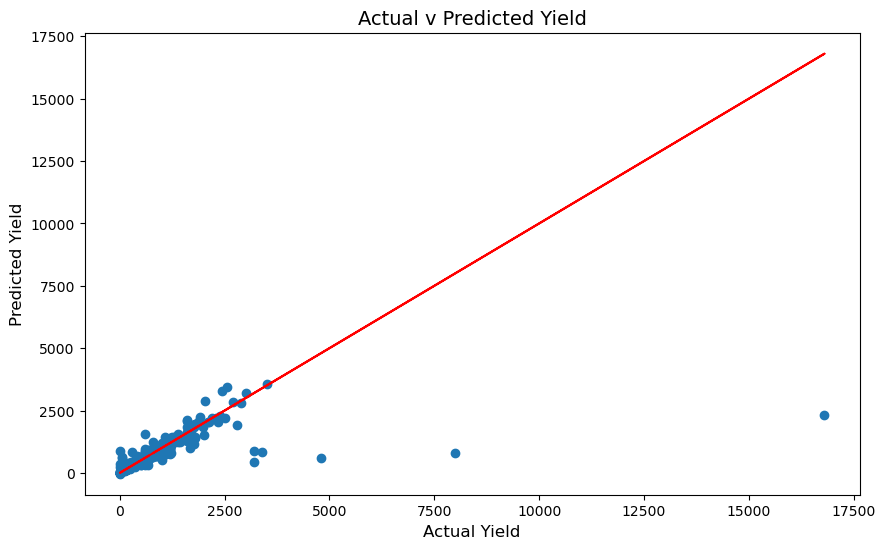

In [19]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, xgb_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, xgb_pred))
print('R2 Score: ', r2_score(y_test, xgb_pred))

# Visualize the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Yield', fontsize=12)
plt.ylabel('Predicted Yield', fontsize=12)
plt.title('Actual v Predicted Yield', fontsize=14)
plt.show();

In [20]:
print('rmse: ', np.sqrt(mean_squared_error(y_test, xgb_pred)))

rmse:  635.3775382359486


In [21]:
sample = pd.read_csv('SampleSubmission.csv')
sample.head()

,ID,Yield
0,ID_F9XXEXN2ADR2,0
1,ID_SO3VW2X4QO93,0
2,ID_UKUQ7JM8E894,0
3,ID_QUISMWEZR2H4,0
4,ID_25JGI455VKCZ,0


In [22]:
test.head()

CultLand  CropCultLand  CropTillageDepth  SeedlingsPerPit  \
0        20            13                 4              1.0   
1        25            25                 5              4.0   
2        30            30                 5              2.0   
3        15            10                 5              2.0   
4        30            10                 3              1.0   

   TransplantingIrrigationHours  TransIrriCost  StandingWater  \
0                           2.0     200.000000       2.000000   
1                           2.0     405.018499       3.000000   
2                           4.0     405.018499      10.000000   
3                           2.0     405.018499       3.267547   
4                           6.0     400.000000       3.267547   

   NoFertilizerAppln  BasalDAP  BasalUrea  1tdUrea  1appDaysUrea  \
0                  3       6.0  13.187761      8.0          23.0   
1                  3       5.0  13.187761      7.0          23.0   
2                  2       9.0  18.000000      9.0          38.0   
3                  2      15.0  13.187761      9.0          30.0   
4                  2      20.0  15.000000     15.0          40.0   

   Harv_hand_rent  Residue_length  Residue_perc      Acre  ID_ID_003IQ6P16IU6  \
0      500.000000              22            10  0.272727                   0   
1      150.000000              28            10  0.227273                   0   
2     1200.000000              28            10  0.281250                   0   
3      300.000000              30            10  0.136364                   0   
4      617.937551              26            40  0.312500                   0   

   ID_ID_01FMRJ8CZ1B9  ID_ID_01YVA2LJVYBR  ID_ID_02G01CVY8X2H  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ID_ID_030L0XB0GEPB  ID_ID_033YEZI2YTMN  ID_ID_03QW4RBYQEBK  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ID_ID_03SHDKQD95XF  ID_ID_044M7JJ7F7ZH  ID_ID_055AL1ZL5ZQ3  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ID_ID_05TGZGOMI6MF  ID_ID_062VNY633NVW  ID_ID_0BE8BMWG3A68  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ID_ID_0BEO9O1TBGD7  ID_ID_0FU2BPIOTMVD  ID_ID_0G0F9TOR4IMI  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   ID_ID_0G0WQUKBXG47  ID_ID_0GCZV8RUSZK6  ID_ID_0GFT8KE7O9RP  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0          

In [83]:
# Create submission file
sub = pd.DataFrame({'ID': sample['ID'], 'Yield': test_pred})
sub.head()

ValueError: array length 3870 does not match index length 1290

In [65]:
sub.to_csv('submit.csv', index=False)